# **Example: Calculating Underground Angular Distributions**

This file demonstrates how to use MUTE to calculate underground angular distributions for labs under mountains using DAEMONFLUX as the surface flux model.

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import mute.constants as mtc
import mute.underground as mtu

*************************************************************************
*                                                                       *
*                ███████████████████████████████████████                *
*                ▓  ▓▓▓▓  ▓▓  ▓▓▓▓  ▓▓        ▓▓       ▓                *
*                ▓   ▓▓   ▓▓  ▓▓▓▓  ▓▓▓▓▓  ▓▓▓▓▓  ▓▓▓▓▓▓                *
*                ▒        ▒▒  ▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒       ▒                *
*                ▒  ▒  ▒  ▒▒  ▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒  ▒▒▒▒▒▒                *
*                ░  ░░░░  ░░░░    ░░░░░░░  ░░░░░       ░                *
*                ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░                *
*                   https://github.com/wjwoodley/mute                   *
*                                                                       *
* Author:  William Woodley                                              *
* Version: 3.0.0                                                        *
*                                     

## Set the Global Constants

In [2]:
mtc.set_verbose(0)
mtc.set_output(False)
mtc.set_lab("Example")
mtc.set_overburden("mountain")
mtc.set_n_muon(1000000)

## Calculate the Underground Angular Distributions

In [3]:
# LVD

mtc.set_medium("rock")
mtc.set_reference_density(2.72)
mtc.load_mountain("LNGS")

lvd_zenith               = mtc.mountain.zenith
lvd_azimuthal            = mtc.mountain.azimuthal
lvd_u_ang_dist_zenith    = mtu.calc_u_ang_dist(kind = "zenith", model = "daemonflux")
lvd_u_ang_dist_azimuthal = mtu.calc_u_ang_dist(kind = "azimuthal", model = "daemonflux")
lvd_u_tot_flux           = mtu.calc_u_tot_flux(model = "daemonflux")

# CJPL

mtc.set_medium("rock")
mtc.set_reference_density(2.8)
mtc.load_mountain("CJPL")

cjpl_zenith               = mtc.mountain.zenith
cjpl_azimuthal            = mtc.mountain.azimuthal
cjpl_u_ang_dist_zenith    = mtu.calc_u_ang_dist(kind = "zenith", model = "daemonflux")
cjpl_u_ang_dist_azimuthal = mtu.calc_u_ang_dist(kind = "azimuthal", model = "daemonflux")
cjpl_u_tot_flux           = mtu.calc_u_tot_flux(model = "daemonflux")

## Plot the Results

Plot the zenith angular distribution against cos(theta). Normalise the distributions by dividing by the total underground flux in order to compare the shapes of the distributions.

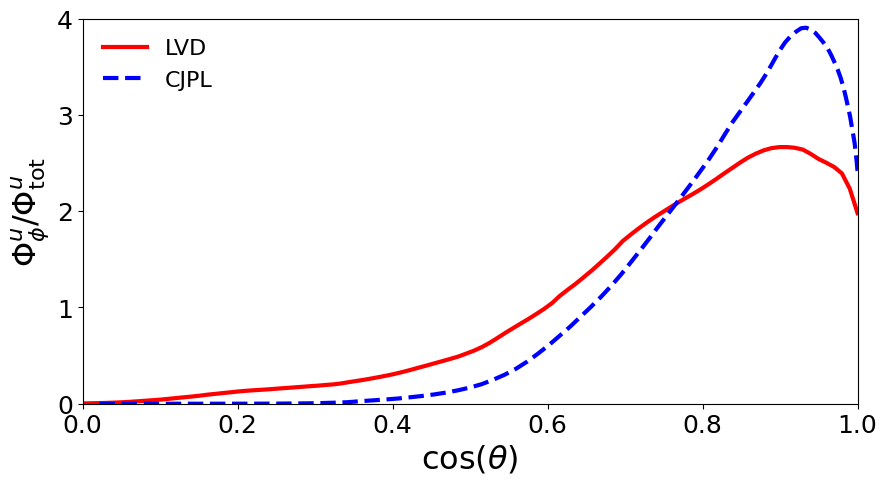

In [4]:
fig = plt.figure(figsize = (10, 5))
ax  = fig.add_subplot(111)

ax.plot(np.cos(np.radians(lvd_zenith)), lvd_u_ang_dist_zenith/lvd_u_tot_flux, color = "red", lw = 3, ls = "-", label = "LVD")
ax.plot(np.cos(np.radians(cjpl_zenith)), cjpl_u_ang_dist_zenith/cjpl_u_tot_flux, color = "blue", lw = 3, ls = "--", label = "CJPL")

ax.set_xlabel(r"$\cos(\theta)$", fontsize = 23)
ax.set_ylabel(r"$\Phi^u_{\phi}/\Phi^u_{\mathrm{tot}}$", fontsize = 23)
ax.tick_params(axis = "both", which = "major", labelsize = 18)
ax.set_xlim([0, 1])
ax.set_ylim([0, 4])

plt.legend(frameon = False, fontsize = 16)

plt.show()

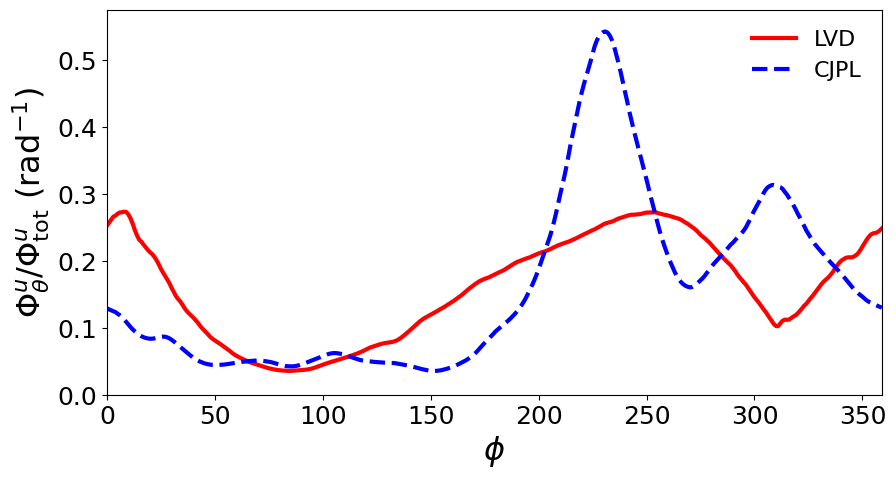

In [5]:
fig = plt.figure(figsize = (10, 5))
ax  = fig.add_subplot(111)

ax.plot(lvd_azimuthal, lvd_u_ang_dist_azimuthal/lvd_u_tot_flux, color = "red", lw = 3, ls = "-", label = "LVD")
ax.plot(cjpl_azimuthal, cjpl_u_ang_dist_azimuthal/cjpl_u_tot_flux, color = "blue", lw = 3, ls = "--", label = "CJPL")

ax.set_xlabel(r"$\phi$", fontsize = 23)
ax.set_ylabel(r"$\Phi^u_{\theta}/\Phi^u_{\mathrm{tot}}$ (rad$^{-1}$)", fontsize = 23)
ax.tick_params(axis = "both", which = "major", labelsize = 18)
ax.set_xlim([0, 359])
ax.set_ylim([0, 0.575])

plt.legend(frameon = False, fontsize = 16)

plt.show()